In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

In [111]:
def make_df(directory):
    csv = pd.read_csv(directory)
    df = pd.DataFrame(csv)
    return df

In [112]:
df_train = make_df('/kaggle/input/spaceship-titanic/train.csv')
df_test = make_df('/kaggle/input/spaceship-titanic/test.csv')

In [113]:
df_train.shape

(8693, 14)

In [114]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [115]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [116]:
pd.set_option('display.max_rows', 20)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [117]:
df_train_Na = df_train.copy()
df_train_NaDrop = df_train_Na.dropna(axis=0)

In [118]:
def factorize_obj(df):
    for i in df.select_dtypes('object'):
        df[i], _ = df[i].factorize()
    return df

In [119]:
def mu_info(df):
    y = df['Transported']
    X = df.copy()
    X = factorize_obj(X)
    info = mutual_info_classif(X, y)
    
    for i, feature in enumerate(X.columns):
        print(f'Feature: {feature}, MI: {info[i]}')
    minfo = pd.DataFrame({'Feature': X.columns, 'MI_Score': info})
    
    return minfo

In [120]:
def plot_sns(df):
    sns.set_theme()
    
    g = sns.relplot(
        data = df,
        x="Feature", y="MI_Score"
    )
    g.set_xticklabels(rotation=90)

In [121]:
nadrop_minfo = mu_info(df_train_NaDrop)

Feature: PassengerId, MI: 0.008135495068486653
Feature: HomePlanet, MI: 0.023192335669419917
Feature: CryoSleep, MI: 0.11021320743186447
Feature: Cabin, MI: 0.01265233685492273
Feature: Destination, MI: 0.006022879230732192
Feature: Age, MI: 0.009629067336717867
Feature: VIP, MI: 0.0
Feature: RoomService, MI: 0.07040614912435306
Feature: FoodCourt, MI: 0.03841624049759185
Feature: ShoppingMall, MI: 0.05648407417650492
Feature: Spa, MI: 0.07556099156829577
Feature: VRDeck, MI: 0.06477471255784173
Feature: Name, MI: 0.005461329209027088
Feature: Transported, MI: 0.6944831856146719


In [122]:
nadrop_minfo

,Feature,MI_Score
0,PassengerId,0.008135
1,HomePlanet,0.023192
2,CryoSleep,0.110213
3,Cabin,0.012652
4,Destination,0.006023
5,Age,0.009629
6,VIP,0.000000
7,RoomService,0.070406
8,FoodCourt,0.038416
9,ShoppingMall,0.056484


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


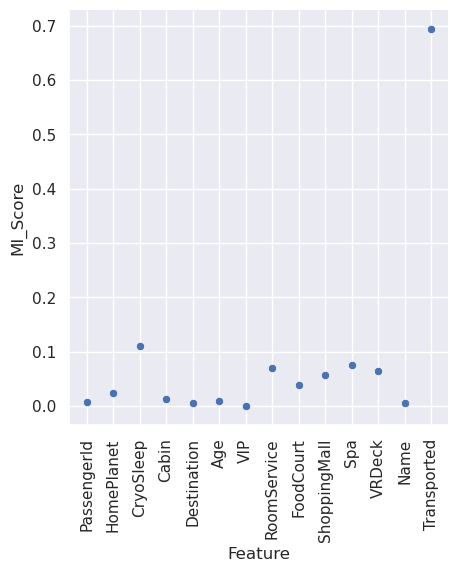

In [123]:
plot_sns(nadrop_minfo)

# Preprocessing

expand and consolidate data

In [124]:
def separate_cabin(df):
    df[['Pri_cabin', 'Sub_cabin', 'Cabin_num']] = df['Cabin'].str.split('/', expand=True, n=3)
    return df

In [125]:
df_train_filt = separate_cabin(df_train)

df_train_filt['Ameniti_paid'] = df_train_filt['RoomService'] + df_train_filt['FoodCourt'] + df_train_filt['ShoppingMall']+ df_train_filt['Spa']+ df_train_filt['VRDeck']

In [126]:
df_train_filt.drop(['Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

In [127]:
df_train_filt

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Pri_cabin,Sub_cabin,Cabin_num,Ameniti_paid
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,Gravior Noxnuther,False,A,98,P,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,Kurta Mondalley,False,G,1499,S,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,Fayey Connon,True,G,1500,S,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,Celeon Hontichre,False,E,608,S,4637.0


In [128]:
df_train_filt.dropna(axis=0, inplace=True)

In [129]:
minfo = mu_info(df_train_filt)

Feature: PassengerId, MI: 0.00808349420354637
Feature: HomePlanet, MI: 0.030862273672111806
Feature: CryoSleep, MI: 0.10803045478406448
Feature: Destination, MI: 0.013665868788004243
Feature: Age, MI: 0.007854174009620074
Feature: VIP, MI: 0.003329297232098405
Feature: Name, MI: 0.006879785806598537
Feature: Transported, MI: 0.6943318080790982
Feature: Pri_cabin, MI: 0.032190245978303667
Feature: Sub_cabin, MI: 0.0
Feature: Cabin_num, MI: 0.008813946298751318
Feature: Ameniti_paid, MI: 0.12273521175033775


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


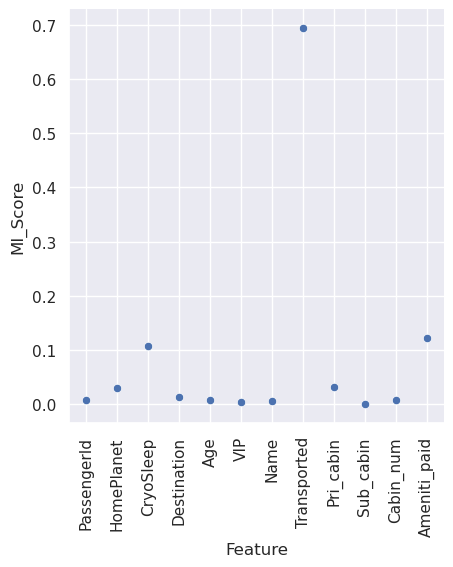

In [131]:
plot_sns(minfo)

# Boxplot high Mu_info

In [151]:
def sns_boxplot(df, x, y):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=x, y=y)

    # Customize plot appearance
    plt.title(x + y)
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()

In [160]:
def sns_countplot(df, x, y):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=x, hue=y)
    
    plt.title(x + y)
    plt.xlabel(x)
    plt.ylabel(y)

    # Show the plot
    plt.show()

In [173]:
def sns_scatter(df, x, y, hue):
    plt.figure(figsize=(12,9))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    
    plt.title(x+y)
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()

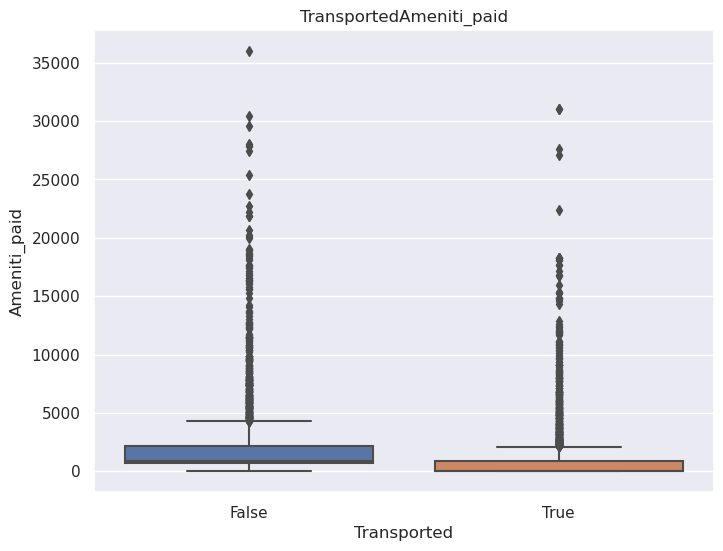

In [168]:
df_train_paid_transport = df_train_filt[['Ameniti_paid', 'Transported']]
sns_boxplot(df_train_paid_transport, 'Transported', 'Ameniti_paid')

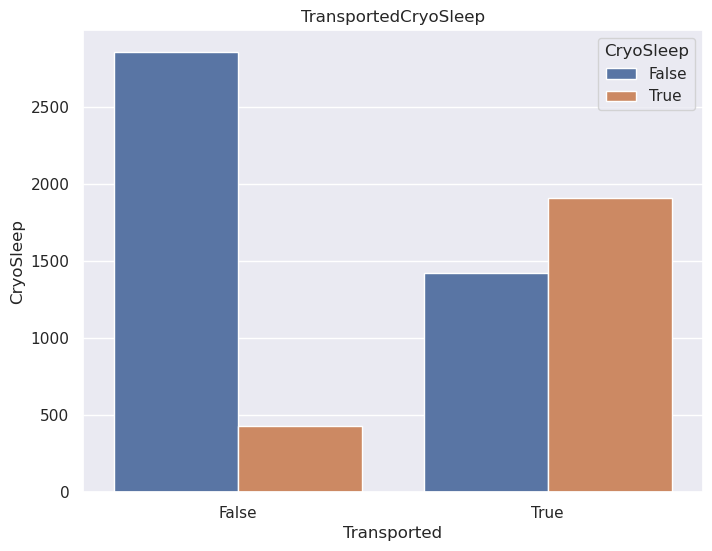

In [169]:
df_train_cryosleep_transported = df_train_filt[['CryoSleep', 'Transported']]
sns_countplot(df_train_cryosleep_transported, 'Transported', 'CryoSleep')

<Axes: xlabel='Age', ylabel='Ameniti_paid'>

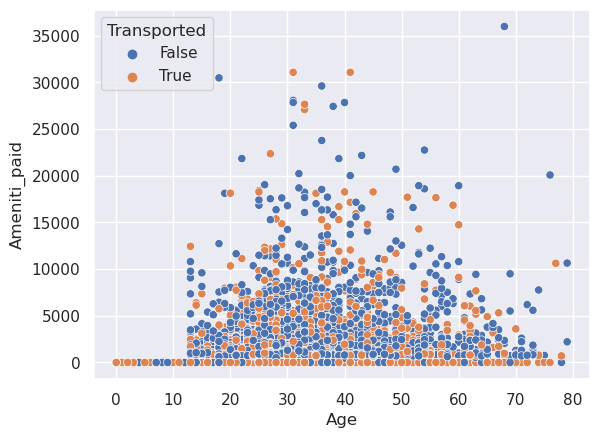

In [176]:
df_train_age_amen = df_train_filt[['Age', 'Ameniti_paid', 'Transported']]
sns.scatterplot(df_train_age_amen, x='Age', y='Ameniti_paid', hue='Transported')

# SNS Heatmap

In [177]:
df_train_filt

df_train_NaDrop

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [178]:
from sklearn.preprocessing import LabelEncoder

def heatmap(df):
    df = factorize_obj(df)
    
    encoder = LabelEncoder()
    cat = df.select_dtypes(include=['object']).columns
    
    for i in cat:
        df[i] = encoder.fit_transform(df[i])
        
    corr_mat = df.corr()
    
    sns.heatmap(corr_mat, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
    plt.show()

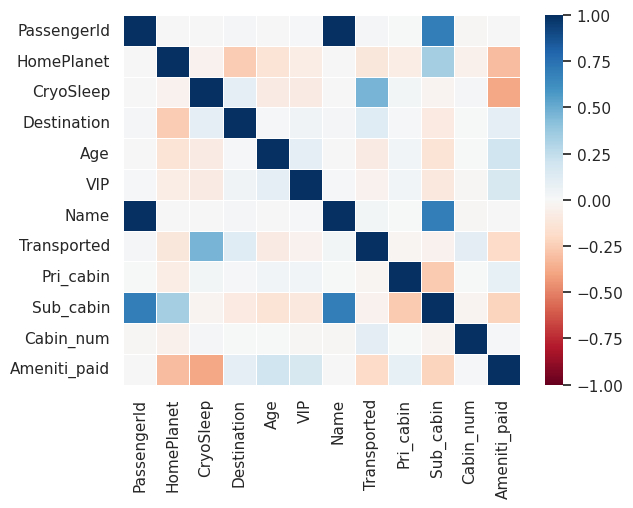

In [179]:
heatmap(df_train_filt)